(ch:sampling-distribution)=
# 표본분포(준비중)

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

표본 분포의 주요 개념을 소개한다.

- 독립동일분포
- 정규분포 연산
- 표본평균의 분포
- 중심극한정리
- 큰 수의 법칙

## 독립동일분포

확률론에서 **독립동일분포**는 특정 확률 분포를 따르는 데이터셋에서 무작위로 표본을 독립적으로 여러 번 추출해서 얻어진 값들로 구성된 데이터를 가리키는 다차원 확률변수를 의미한다.
독립동일분포는 보통 'independently and identically distributed'의 표현의 줄임말인 **iid**로 불린다.

예를 들어 동일한 주사위를 10 번 던져서 나온 값들로 구성된 튜플,
무작위로 선택된 100명에게 물은 동일한 질문에 대한 답으로 구성된 튜플 등을
가리키는 확률변수가 대표적인 독립동일분포다.
단, 다음 사항에 주의해야 한다.

- 주사위를 반복해서 던질 때 동일 조건에서 반복되어야 함. 
- 무작위로 선택된 사람의 답변이 다른 사람의 답변과 어떤 영향도 주고받지 않아야 함.

### 독립성

확률변수 $X$와 $Y$가 서로 어떤 영향도 끼치지 않을 때 서로 독립이라 한다.
수식으로 표혀하면 다음 수식이 성립할 때 두 확률변수가 서로 독립이라 정의한다.

$$
f_{XY}(x, y) = f_X(x) \cdot f_Y(y)
$$

위 수식에서 $f_X$와 $f_Y$ 는 각각 $X$와 $Y$에 대한 주변 확률 밀도 함수를 가리키며
다음과 같이 정의된다.

$$
f_X(x) = \sum_y f_{XY}(x, y) \qquad f_Y(y) = \sum_x f_{XY}(x, y)
$$

**예제**

예를 들어 $X$는 공정한 주사위를 던져서 나오는 값을 가리키는 확률변수라 하자.
$X$의 확률 분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

반면에 $Y$는 아래 확률 분포를 갖는 불공적한 주사위를 던져서 나오는 값을 가리키는 확률 변수라 하자.

| Y | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/21 | 2/21 | 3/21 | 4/21 | 5/21 | 6/21 |

공정한 주사위와 불공정한 주사위를 동시에 던져서 나오는 값의 튜플을 가리키는
결합 확률변수 $(X, Y)$의 결합 확률 질량 함수의 결합 확률 질량 함수는 다음과 같다.

In [8]:
def f_XY(x, y):
    if y in range(1, 7):
        return (1/6) * (y/21) # x의 확률은 항상 1/6
    else:
        return 0

확률변수 각각에 대한 주변 확률 질량 함수를 `f_XY()`를 이용하여 정의해보자.

- $X$에 대한 주변 확률 질량 함수

In [9]:
def f_X(x):
    y_probs = [f_XY(x, y) for y in range(1, 7)]
    return np.sum(y_probs)

- $Y$에 대한 주변 확률 질량 함수

In [10]:
def f_Y(y):
    x_probs = [f_XY(x, y) for x in range(1, 7)]
    return np.sum(x_probs)

아래 코드가 두 확률변수의 독립성을 확인해준다

In [11]:
xy = [f_XY(x, y) for x in range(1, 7) for y in range(1, 7)]
xMy = [f_X(x) * f_Y(y) for x in range(1, 7) for y in range(1, 7)]
np.allclose(xy, xMy)

True

**독립성의 다른 정의**

다음이 성립한다.

> 확률변수 각각에 대한 주변 확률 질량 함수가 개별 확률 질량 함수와 동일하면 두 확률변수는 서로 독립이다.

위 성질을 이용하여 공정한 주사위와 불공정한 주사위를 동시에 던진 결과를 가리키는
각각의 확률변수가 서로 독립임을 증명한다.

먼저 공정한 주사위를 던져 나온 결과를 가리키는 확률변수 $X$의 확률 질량 함수는 다음과 같이 정의된다.

In [12]:
def f_massX(x):
    if x in range(1, 7):
        return 1/6
    else:
        return 0

반면에 불공정한 주사위를 던져 나온 결과를 가리키는 확률변수 $Y$의 확률 질량 함수는 다음과 같이 정의된다.

In [13]:
def f_massY(y):
    if y in range(1, 7):
        return y/21
    else:
        return 0

아래 코드는 `f_X()` 함수와 `f_massX()` 함수가 동일함을 보인다.

In [14]:
np.allclose([f_X(x) for x in range(1, 7)], [f_massX(x) for x in range(1, 7)])

True

반면에 아래 코드는 `f_Y()` 함수와 `f_massY()` 함수가 동일함을 보인다.

In [15]:
np.allclose([f_Y(y) for y in range(1, 7)], [f_massY(y) for y in range(1, 7)])

True

**확률변수 각각에 대한 주변 확률 질량 함수와 개별 확률 질량 함수는 다르다!**

(준비중 ...)

| X | Y | P |
| :---: | :---: | :---: |
| A | 0 | 0.1 |
| A | 1 | 0.2 |
| B | 0 | 0.3 |
| B | 1 | 0.4 |

### 독립성 대 무상관성

확률변수 $X$와 $Y$가 서로 독립이면 두 확률변수 사이에 어떠한 상관성도 존재하지 않는다.
예를 들어, 결합 확률분포의 공분산과 상관계수도 0이 된다.
여기서는 두 개의 이산 확률변수 $X$와 $Y$로 구성된 결합 확률변수 $(X, Y)$를 
이용하여 독립성과 무상관성을 설명한다. 

$(X, Y)$의 확률 질량 함수를 $f_{XY}$ 할 때 각 확률변수에 대한 
주변 확률 질량 함수, 기댓값, 분산과
두 확률변수의 선형 상관관계를 측정하는 공분산과 피어슨 상관계수는
아래와 같이 정의된다.

- 기댓값

$$
\begin{align*}
E[X] &= \sum_x x\, f_X(x) = \sum_x x\, \sum_y f_{XY}(x, y)\\[.5ex] 
E[Y]&= \sum_y y\, f_Y(y) = \sum_y y\, \sum_x f_{XY}(x, y)\\[.5ex]
\end{align*}
$$

- 분산

$$
\begin{align*}
Var(X) &= \sum_x (x-E[X])^2\, f_X(x)\\[.5ex] 
Var(Y) &= \sum_y (y-E[Y])^2\, f_Y(y)\\[.5ex] 
\end{align*}
$$

- 공분산과 피어슨 상관계수

$$
\begin{align*}
Cov[X, Y] &= \sum_{x}\sum_y (x-E[X])\, (y-E[Y]) \, f_{XY}(x, y)\\[1ex]
Corr[X, Y] &= \frac{Cov[X, Y]}{\sqrt{Var(X)\, Var(Y)}}\
\end{align*}
$$

**독립이면 무상관이다!**

아래 식은 두 확률변수가 서로 독립이면 공분산이 0임을 증명한다.

$$
\begin{align*}
Cov[X, Y] &= \sum_{x}\sum_y (x-E[X])\, (y-E[Y]) \, f_{XY}(x, y)\\[1ex]
 &= \sum_{x}\sum_y (x-E[X])\, (y-E[Y]) \, f_{X}(x)\, f_{Y}(y)\\[1ex]
 &= \sum_{x}\big( (x-E[X])\, f_{X}(x)\, \sum_y (y-E[Y]) \, f_{Y}(y)\big )\\[1ex]
 &= 0
\end{align*}
$$

위 수식에서 마지막줄이 0인 이유는 바로 윗줄에 포함된 아래 수식이 0으로 계산되기 때문이다.

$$
\begin{align*}
\sum_y (y-E[Y]) \, f_{Y}(y) &= \sum_y y \, f_{Y}(y) - \sum_y E[Y] \, f_{Y}(y) \\[.5ex]
    &= E[Y] - E[Y] \, \sum_y f_{Y}(y) \\[.5ex]
    &= E[Y] - E[Y] \\[.5ex]
    &= 0
\end{align*}
$$

실제로 공정한 주사위를 던진 결과와 불공정한 주사위를 던진 결과의 공분산은 0으로 계산된다.
공분산이 0이면 피어슨 상관계수다 당연히 0이다.

- $X$의 기댓값: $E[X]$

In [16]:
E_X = np.sum([x * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_X

3.500000

- $Y$의 기댓값: $E[Y]$

In [17]:
E_Y = np.sum([y * f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])
E_Y

4.333333

- $X$와 $Y$의 공분산

In [18]:
np.sum([(x-E_X)*(y-E_Y)*f_XY(x, y) for x in range(1, 7) for y in range(1, 7)])

-0.000000

**무상관이지만 독립이 아닐 수 있다!**

(준비중 ...)

단, 두 정규분포의 결확 확률 분포의 경우에는 공분산이 0이면 두 분포가 서로 독립임의 의미한다.
증명은 생략한다.

## 정규분포 연산

### 합과 차

상호 독립인 확률변수 $X$와 $Y$가 정규분포를 따른다고 가정한다.

$$
X \sim N(\mu_X, \sigma_X^2) \qquad Y \sim N(\mu_y, \sigma_y^2)
$$

그러면 두 확률 번수의 합과 차를 확률변수 $X+Y$와 $X-Y$ 모두 정규분포를 따르며
두 분포가 따르는 정규분포는 다음과 같다.

$$
X+Y \sim N(\mu_X+\mu_Y,\sigma_{X}^{2}+\sigma_{Y}^{2}) \qquad X-Y \sim N(\mu_X-\mu_Y,\ \sigma_{X}^{2}+\sigma_{Y}^{2})
$$

즉, $X+Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 합과 분산의 합으로,
$X-Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 차와 분산의 합으로 계산된다.
$X+Y$와 $X-Y$의 분산이 두 확률변수 각각의 분산의 합으로 계산되는 이유를 직관적으로 설명하기 위해
다음 두 예제를 이용한다.

**예제: 남성, 여성 체중의 합의 분포**

2024년도 기준 한국 20대 남성, 여성의 체중 분포 $X$와 $Y$는 다음과 같다.

$$
X \sim N(76.59, 11.73^2) \qquad Y \sim N(58.17, 9.28^2)
$$

남성과 여성의 체중은 상호 독립이라고 가정했을 때 남성과 여성의 체중의 합은
다음 분포를 따라야 한다. 

$$
X+Y \sim N(134.76, 14.96^2)
$$

위 사실을 코드로 확인해보기 위해 언급된
평균값과 표준편차를 갖는 남성과 여성의 체중 데이터를 
각각 1천개씩 무작위로 생성한다.

In [24]:
from scipy.stats import norm

- 남녀 체중의 평균값과 표준편차 지정

In [20]:
mu_men = 76.59
sigma_men = 11.73

mu_wemen = 58.17
sigma_wemen = 9.28

- 평균값의 합과 차, 분산 합의 제곱근값 계산

In [21]:
mu_sum = mu_men + mu_wemen
mu_diff = mu_men - mu_wemen

sigma_sum = np.sqrt(sigma_men**2 + sigma_wemen**2)

In [27]:
print("평균값 합:", mu_sum)

평균값 합: 134.76


In [29]:
print("평균값 차:", mu_diff)

평균값 차: 18.42


In [28]:
print("분산 합의 제곱근:", sigma_sum)

분산 합의 제곱근: 14.956981647377923


- 남성, 여성, 합, 차의 정규분포 지정

In [30]:
X_men = norm(mu_men, sigma_men)
X_wemen = norm(mu_wemen, sigma_wemen)

X_sum = norm(mu_sum, sigma_sum)
X_diff = norm(mu_diff, sigma_sum)

- 남녀 각각 1천개 데이터 무작위 생성. 단, 지정된 정규분포 활용.

In [33]:
data_men = X_men.rvs(size=1000)
data_wemen = X_wemen.rvs(size=1000)

- 생성된 남녀 데이터

In [32]:
data = pd.DataFrame({'Men': data_men, 'Wemen':data_wemen})
data

,Men,Wemen
0,62.027960,59.710974
1,79.415215,66.637169
2,80.919964,48.546829
3,77.889106,53.609414
4,70.085508,52.952373
...,...,...
995,73.987761,69.184173
996,77.095120,64.205356
997,71.245252,59.826369
998,82.850170,48.348506


- 남녀 데이터 합과 차 데이터 추가

In [34]:
data['Men+Wemen'] = data_men + data_wemen
data['Men-Wemen'] = data_men - data_wemen
data

,Men,Wemen,Men+Wemen,Men-Wemen
0,62.027960,59.710974,149.051053,-0.308259
1,79.415215,66.637169,157.602664,7.452088
2,80.919964,48.546829,116.160236,17.579348
3,77.889106,53.609414,129.794903,-3.149370
4,70.085508,52.952373,142.383678,35.178125
...,...,...,...,...
995,73.987761,69.184173,128.156282,12.296094
996,77.095120,64.205356,139.710140,13.747887
997,71.245252,59.826369,134.605522,8.356791
998,82.850170,48.348506,145.154678,6.091747


- 생성된 데이터셋의 평균값, 표준편차 확인

In [35]:
data.describe()

,Men,Wemen,Men+Wemen,Men-Wemen
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.681705,58.108968,134.729955,18.097546
std,11.662445,9.186668,15.110511,15.219004
min,38.081253,28.674709,88.481727,-31.678819
25%,68.894230,51.820178,124.680551,7.941590
50%,76.548579,58.110627,135.321121,18.764990
75%,84.604448,64.264080,144.809503,28.381429
max,117.161423,87.189456,177.049071,62.727370


정규분포를 따르는 데 확률변수의 합과 차 데이터또한 
이론적으로 추청된 평균값과 표준편차를 갖는 정규분포를 따른다.
아래 코드는 이를 그래프로 확인해준다.

- 합 데이터 분포 그래프

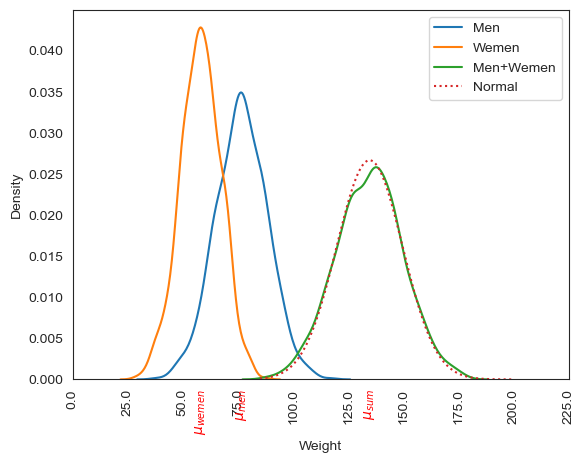

In [36]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men+Wemen'], label='Men+Wemen')

x = np.arange(85, 200, 0.01)
ax.plot(x, X_sum.pdf(x), linestyle=':', label='Normal')

x_ticks = np.append(ax.get_xticks(), [mu_men, mu_wemen, mu_sum])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{sum}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

- 차 데이터 분포 그래프

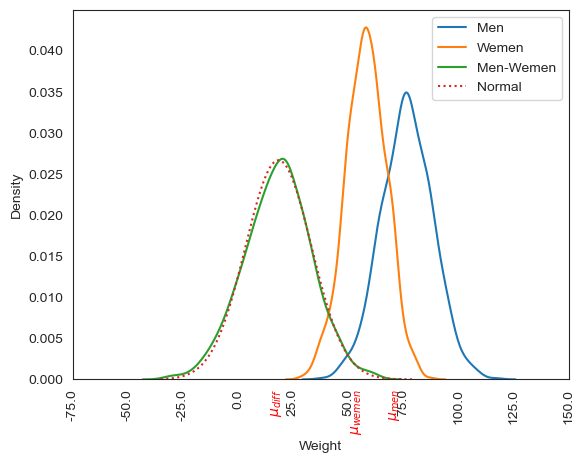

In [38]:
fig, ax = plt.subplots()

sns.kdeplot(ax=ax, data=data['Men'], label='Men')
sns.kdeplot(ax=ax, data=data['Wemen'], label='Wemen')
sns.kdeplot(ax=ax, data=data['Men-Wemen'], label='Men-Wemen')

x = np.arange(-35, 80, 0.01)
ax.plot(x, X_diff.pdf(x), linestyle=':', label='Normal')

x_ticks = np.append(ax.get_xticks(), [71.2, 53.7, 17.5])
x_ticks_ = np.append(ax.get_xticks(), [r'$\mu_{men}$', r'$\mu_{wemen}$', r'$\mu_{diff}$']) # 실제로 보이는 눈금 기호

ax.set_xticks(x_ticks, x_ticks_, rotation=90)
ax.get_xticklabels()[-3].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('Weight')
ax.legend()

plt.show()

### 상호 독립성의 중요성

$X$와 $Y$가 상호 독립이지 않으면 정규분포의 합과 차가 정규분포를 따르지 않을 수 있다.
설명을 위해 {numref}`%s장 <ch:normal-distribution>`에서 소개한
피어슨의 아버지와 아들의 키 데이터셋을 활용한다.
이유는 아들 키는 아버지의 키 유전자에 많은 영향을 받아 절대로 독립적일 수 없기 때문이다.

아래 코드는 피어슨<font size='2'>Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [41]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [42]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**아버지 키와 아들 키의 상관관계**

예상대로 아버지 키와 아들 키 데이터의 공분산이 0이 아니다.

In [45]:
pearson.cov(ddof=0)

,Father,Son
Father,48.612085,24.984513
Son,24.984513,51.125832


피어슨 상관계수를 보면 0.5 정도로 상당히 높은 편이다.
아버지 키가 아들 키에 많은 영향을 준다는 것이 확실하다.

In [46]:
pearson.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


결론적으로 두 데이터는 상호 독립이 절대로 아니다.
실제로 아버지키와 아들 키의 합은 정규분포를 따르지 않음을
아래 코드가 보여준다.

In [48]:
pearson['Father+Son'] = pearson['Father'] + pearson['Son']

pearson_desc = pearson.describe()
pearson_desc

,Father,Son,Father+Son
count,1078.000000,1078.000000,1078.000000
mean,171.922635,174.457978,346.380612
std,6.975473,7.153552,12.241158
min,149.900000,148.600000,307.800000
25%,167.100000,169.900000,338.025000
50%,172.200000,174.200000,346.400000
75%,176.800000,179.100000,354.800000
max,191.500000,199.100000,381.000000


평균값의 합은 유지된다.

In [49]:
mu_FS = pearson_desc.loc['mean', 'Father'] + pearson_desc.loc['mean', 'Son']
mu_FS

346.380612

그런데 합의 분산이 두 분산의 합과 다르다.

- 분산의 합

In [50]:
sigma_FS_squared = pearson_desc.loc['std', 'Father'] ** 2 + pearson_desc.loc['std', 'Son'] ** 2
sigma_FS_squared

99.830524

- 이론적인 아버지 키와 아들 키의 합의 표준편차

In [51]:
sigma_FS = np.sqrt(sigma_FS_squared)
sigma_FS

9.991523

이론과 실제 계산된 표준편차가 많이 다르다.

- 실제 아버지 키와 아들 키의 합의 표준편차

In [52]:
sigma_FaddS = pearson_desc.loc['std', 'Father+Son']
sigma_FaddS

12.241158

데이터의 분포를 그래프로 그려보면 합의 분포가 정규분포가 아님을 
보다 명확하게 확인할 수 있다.

- (아버지 키 + 아들 키)의 이론적 정규분포

In [53]:
from scipy.stats import norm

X_FS = norm(mu_FS, sigma_FS)

- 확률 밀도 함수 그래프로 구분하기

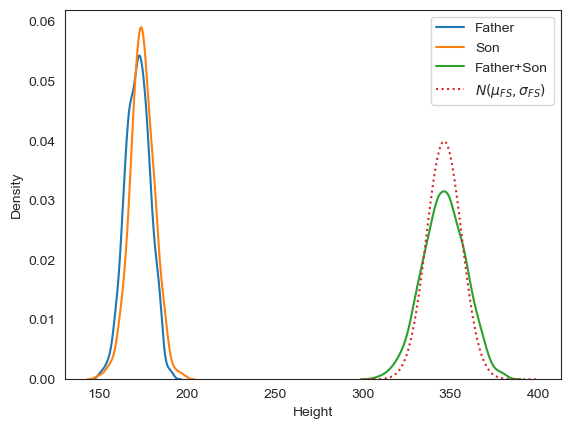

In [54]:
fig, ax = plt.subplots()

# KDE 기법으로 계산된 확률 밀도 함수 그래프
# 아버지 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Father'], label='Father')
# 아들 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Son'], label='Son')
# (아버지 키+아들 키)의 실제 분포: 정규분포 아님
sns.kdeplot(ax=ax, data=pearson['Father+Son'], label='Father+Son')

# (아버지 키+아들 키)의 이론적 정규분포
x = np.linspace(300, 400, 100)
ax.plot(x, X_FS.pdf(x), linestyle=':', label=r'$N(\mu_{FS}, \sigma_{FS})$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()
plt.show()

### 정규분포 선형 변환

* 전제
$$X ∼ N(μ, 𝜎^{2})$$

* 결론
$$⇒\ aX+b ∼ N(aμ+b,\ a^{2}𝜎)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, 중력이 지구의 4배인 행성이 있고 모든 한국인이 그 행성으로 이주했다고 가정하자.      
그러면 모든 한국인의 체중이 지구에서의 체중의 4배로 늘어난다. 따라서 체중의 평균도 4배, 즉 4μ가 된다.

반면에, 체중의 분산은 지구에서의 경우보다 $4^2배,\ 즉\ 16𝜎^2$이 된다.

따라서, 새로운 행성에서의 한국인 체중은 아래의 분포를 따른다

$$
4X∼ N(4μ,16𝜎^2)
$$

$4X$는 사람들의 체중이 4배되었음을 의미한다.

이렇게 기존에 사용된 데이터가 $ax+b의\ 방식으로\ 변하면,\ _{(기존\ 데이터의\ 각각의\ 값을\ a배한\ 후\ b를\ 더해주는\ 방식)}$,
즉, **선형 변환**을 하면 새로운 데이터의 평균과 분산은 아래와 같이 변한다.

$$
aX+b ∼ N(a⋅μ+b,\ \ a^2𝜎^2)
$$

## 표본평균의 분포

### 정규분포의 독립 관측

* 전제
$$X ∼ N(μ, 𝜎^{2})$$
$$⇒ X_{1}, ⋯, X_ n\ 모두\ X의\ 독립\ 관측$$ 

* 결론
$$X_1+⋯+X_n ∼ N(nμ, n𝜎^2)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, <u>한국인 성인 4명을 무작위로, 그리고 상호 독립적으로 선발</u>하였을 때 4명 체중의 합의 평균은 4μ이다.

또한, 4명 체중의 합의 분산도 $4𝜎^2$이 된다.

무작위적이며 상호 독립적인 방식으로 4명을 선택하여 합한 체중의 분포를 $X+X+X+X$로 표기한다

> $X+X+X+X$는 4명을 무작위적이며, 서로 아무 상관없이 독립적으로 선택한다는 의미

이때 $X+X+X+X ∼ N(4μ,4𝜎^2)$이 성립한다.

일반적으로 아래 공식이 성립한다.

$$
X_1+X_2+⋯+X_n ∼ N(nμ,n𝜎^2)
$$

단, $X_i$는 모두 $X$의 독립관측이다. ($X$를 독립적으로 $n$번 반복한다는 의미)

**캘리포니아 주택가격 데이터셋**

캘리포니아 주택가격 데이터셋을 계속해서 활용한다.

- 캘리포니아 주택가격 데이터셋

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 가구중위소득과 주택중위가격만 활용

In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


- 이상치 제거: 중위주택가격이 50만을 초과하는 경우 삭제. 이후 인덱스 초기화

In [9]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


In [10]:
total_number = housing.shape[0]
total_number

19675

### 중심극한정리

**10% 표본추출**

In [31]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value
district,,
15377,4.1116,187500.0
282,5.9849,371000.0
5346,2.8106,184400.0
12420,1.8589,144000.0
8840,4.3182,252700.0
...,...,...
16738,2.5804,216300.0
15067,2.3887,337500.0
13340,1.7062,86800.0


**표본추출 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [32]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 표본추출:")
    print(sampling.mean())
    print()

1번째 표본추출:
median_income              3.679355
median_house_value    193633.197763
dtype: float64

2번째 표본추출:
median_income              3.657730
median_house_value    192268.378241
dtype: float64

3번째 표본추출:
median_income              3.686453
median_house_value    194232.130147
dtype: float64

4번째 표본추출:
median_income              3.702366
median_house_value    197300.254194
dtype: float64

5번째 표본추출:
median_income              3.683035
median_house_value    193355.210981
dtype: float64



In [33]:
sampling

,median_income,median_house_value
district,,
5212,3.3955,225000.0
17995,6.8872,305200.0
8700,5.1163,233200.0
737,3.4722,135400.0
11647,2.4554,89400.0
...,...,...
6484,3.5875,309300.0
11136,3.0870,196900.0
19440,4.9234,241400.0


아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모은다.

In [34]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [35]:
np.mean(income_mean)

3.676986

표본평균의 분산이 매우 작다.

In [36]:
np.var(income_mean)

0.001269

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [37]:
housing['median_income'].mean()

3.676717

### 큰 수의 법칙

...

## 연습문제

참고: [(연습) 표본 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling_distribution.ipynb)